In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# Loading the dataset to pandas dataframe
df1 = pd.read_csv('/content/creditcard.csv')

In [ ]:
# first 5 rows of the dataset
df1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# dataset shape
df1.shape

(284807, 31)

In [ ]:
# Columns in dataset
df1.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
# dataset informations
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# dataset numeric columns statistics
df1.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,9.289524e-16,-1.803266e-15,1.674888e-15,1.475621e-15,3.501098e-15,1.392460e-15,-7.466538e-16,4.258754e-16,9.019919e-16,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
# number of missing values in each column
df1.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

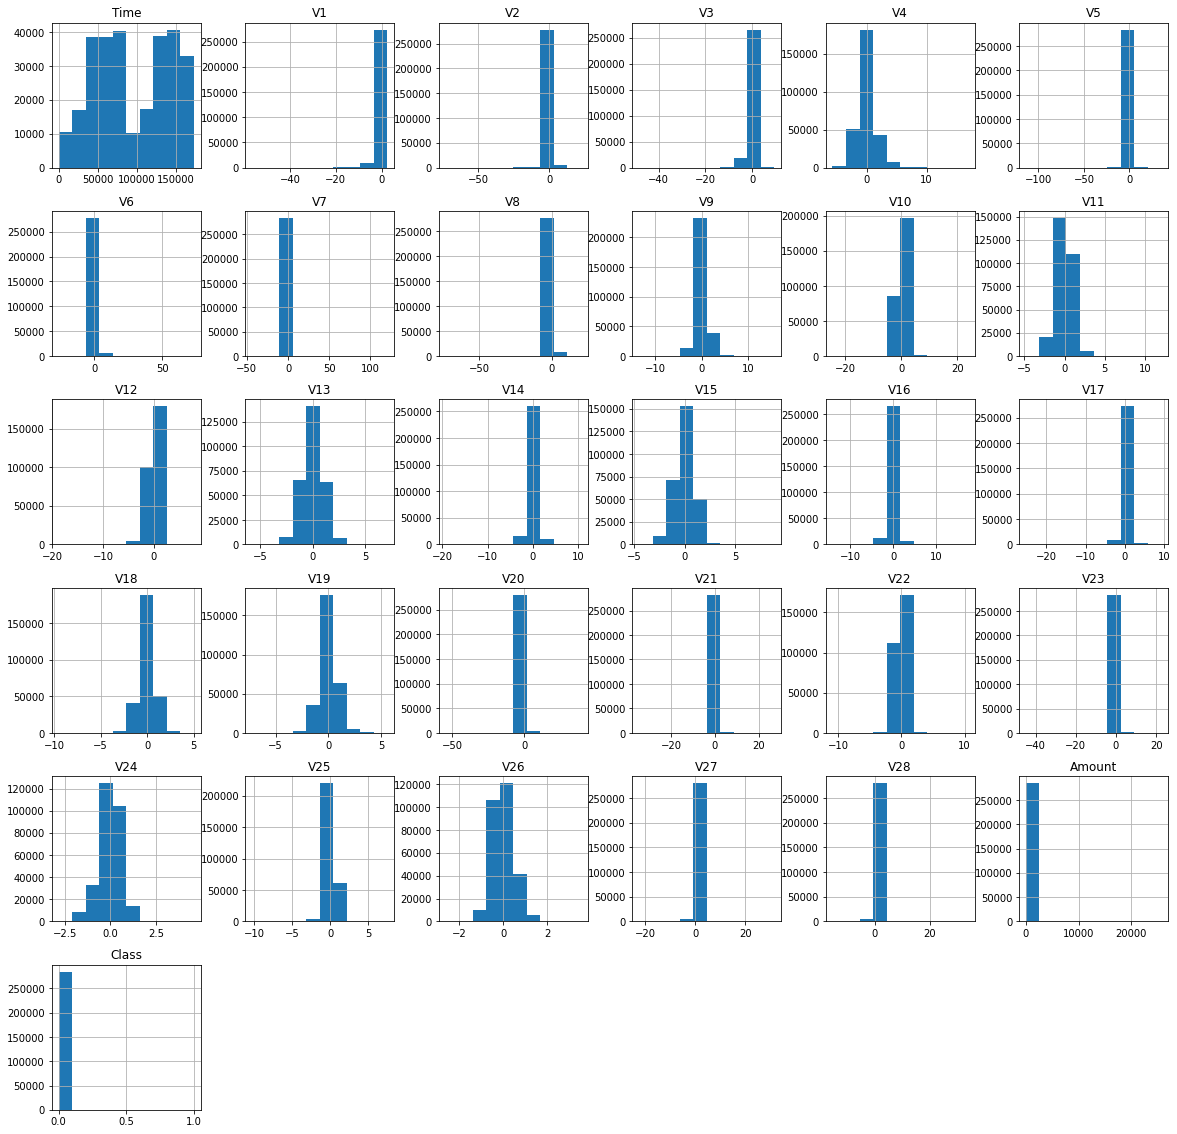

In [ ]:
# Plot histogram of each parameter
df1.hist(figsize = (20,20))
plt.show()

In [ ]:
# distribution of legit transactions & fraudulent transactions
df1['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

This data is highely unbalanced.

0 -> Normal Transaction
1 -> fraudulent transaction

In [ ]:
# separating the data for analysis
legit = df1[df1.Class == 0]
fraud = df1[df1.Class == 1]
len(fraud) / float(len(legit))

0.0017304750013189597

In [ ]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [ ]:
# statistical measures of the data
print(legit.Amount.describe())
print(fraud.Amount.describe())

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [ ]:
# compare the mean values for both transactions
df1.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,-0.006576,0.010832,0.000189,0.012064,0.000161,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


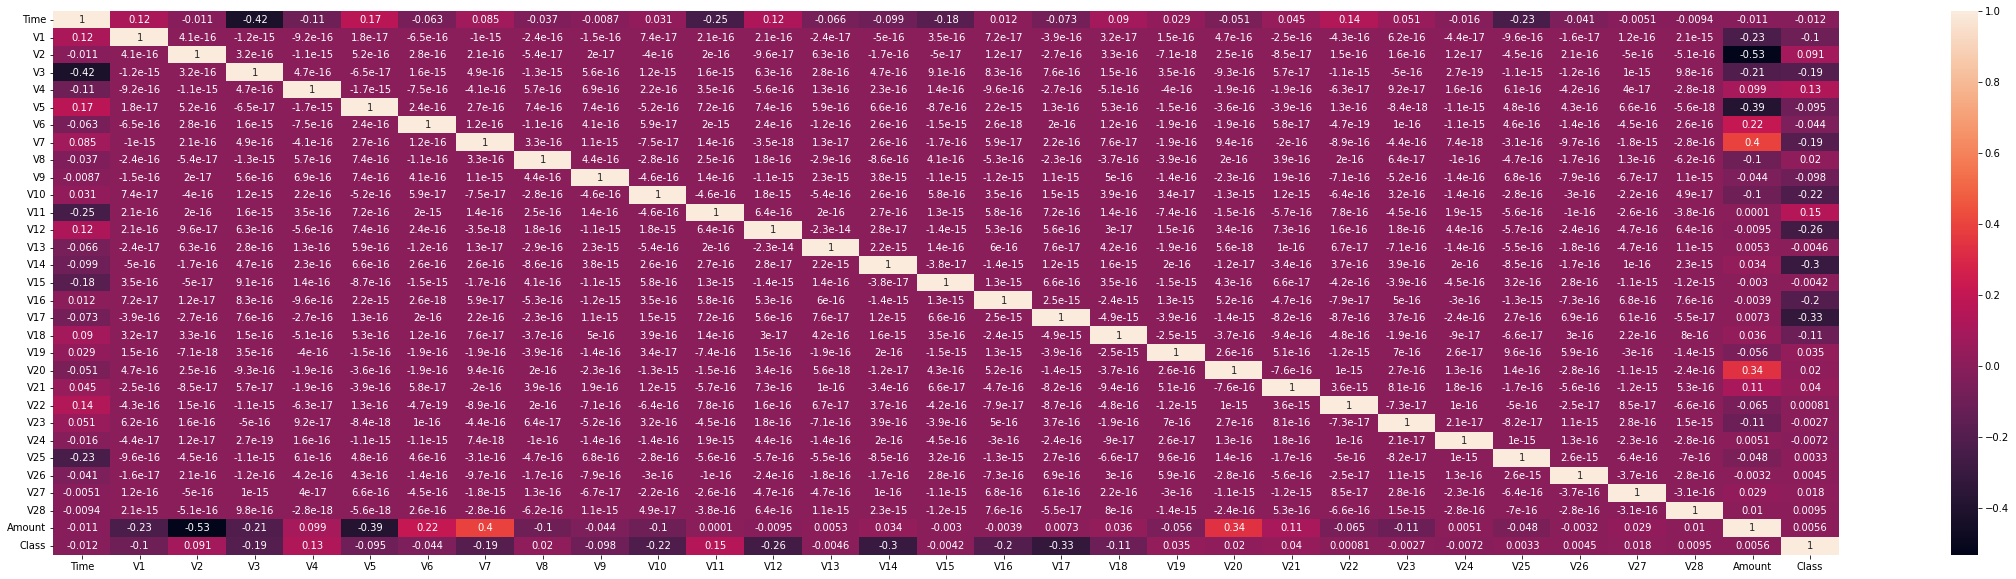

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize = (40,10))
sns.heatmap(df1.corr(), annot = True, ax = ax)


Build a sample dataset containing 50000 normal transactions.

Number of Fraudulent Transactions --> 492

In [ ]:
legit_sample = legit.sample(n=50000)

Concatenating two DataFrames

In [ ]:
df = pd.concat([legit_sample, fraud], axis=0)

In [ ]:
# top 5 values of new dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
8551,11509.0,1.242999,0.081536,1.023983,0.518626,-0.840999,-0.759447,-0.474231,-0.146618,1.800679,-0.536739,0.625843,-2.393098,1.584070,1.524866,0.660299,0.531006,0.246573,0.123211,-0.391055,-0.130915,-0.249019,-0.474393,0.115605,0.347157,0.082961,0.408835,-0.052248,0.015607,6.00,0
98705,66776.0,1.110953,0.380877,0.871054,2.564692,-0.412853,-0.189159,-0.104237,0.142342,-0.562223,0.793782,0.905787,0.141449,-1.498600,0.537286,-0.830702,0.584092,-0.460843,-0.007468,-0.483924,-0.244528,-0.178110,-0.563698,0.089552,0.468585,0.309547,-0.173954,-0.013878,0.013573,5.41,0
19915,30647.0,1.203105,0.252353,0.633054,0.546818,-0.463448,-0.769369,0.008404,-0.109184,-0.328698,0.083359,1.778276,1.476728,0.855222,0.316734,0.243995,0.408651,-0.637203,-0.194646,0.089056,-0.046103,-0.184596,-0.540312,0.141201,0.548449,0.182356,0.062232,-0.028324,0.012365,1.98,0
172330,121055.0,2.042424,-1.106611,-0.489729,-0.938862,-1.058790,-0.357908,-0.976931,0.000949,-0.190282,0.852520,0.735492,0.315881,0.409912,-0.299497,-0.479575,1.541088,-0.252793,-0.934843,1.012635,0.099372,0.018960,-0.062155,0.289560,-0.355151,-0.497267,-0.490676,0.000573,-0.044367,60.00,0
266425,162328.0,-1.174103,-0.222169,1.099893,-2.984348,-0.834085,-0.700750,-0.398882,0.476014,-2.587653,0.545774,0.433658,-0.472356,-0.102464,0.027402,-1.466902,-0.221902,0.336555,0.392070,-0.531937,-0.251275,-0.088025,-0.045038,-0.303128,-0.013722,0.734685,-0.122800,0.132203,-0.005853,28.80,0


In [ ]:
# last 5 values of new dataset
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,-0.888722,0.491140,0.728903,0.380428,-1.948883,-0.832498,0.519436,0.903562,1.197315,0.593509,-0.017652,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [ ]:
df['Class'].value_counts()

0    50000
1      492
Name: Class, dtype: int64

In [ ]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,95072.767100,0.004066,-0.004924,0.001754,-0.008507,0.013733,0.004256,0.012077,-0.007387,0.005288,0.015972,-0.006269,0.007916,0.004011,0.014284,0.003714,0.006246,0.011343,0.000472,-0.000258,-0.001985,0.000309,0.003394,-0.002308,-0.002952,-0.001161,-0.001377,0.000007,0.001618,88.044208
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Splitting the data into Features & Targets

In [ ]:
X = df.drop(columns='Class', axis=1)
Y = df['Class']

In [ ]:
# independent variable
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
8551,11509.0,1.242999,0.081536,1.023983,0.518626,-0.840999,-0.759447,-0.474231,-0.146618,1.800679,-0.536739,0.625843,-2.393098,1.584070,1.524866,0.660299,0.531006,0.246573,0.123211,-0.391055,-0.130915,-0.249019,-0.474393,0.115605,0.347157,0.082961,0.408835,-0.052248,0.015607,6.00
98705,66776.0,1.110953,0.380877,0.871054,2.564692,-0.412853,-0.189159,-0.104237,0.142342,-0.562223,0.793782,0.905787,0.141449,-1.498600,0.537286,-0.830702,0.584092,-0.460843,-0.007468,-0.483924,-0.244528,-0.178110,-0.563698,0.089552,0.468585,0.309547,-0.173954,-0.013878,0.013573,5.41
19915,30647.0,1.203105,0.252353,0.633054,0.546818,-0.463448,-0.769369,0.008404,-0.109184,-0.328698,0.083359,1.778276,1.476728,0.855222,0.316734,0.243995,0.408651,-0.637203,-0.194646,0.089056,-0.046103,-0.184596,-0.540312,0.141201,0.548449,0.182356,0.062232,-0.028324,0.012365,1.98
172330,121055.0,2.042424,-1.106611,-0.489729,-0.938862,-1.058790,-0.357908,-0.976931,0.000949,-0.190282,0.852520,0.735492,0.315881,0.409912,-0.299497,-0.479575,1.541088,-0.252793,-0.934843,1.012635,0.099372,0.018960,-0.062155,0.289560,-0.355151,-0.497267,-0.490676,0.000573,-0.044367,60.00
266425,162328.0,-1.174103,-0.222169,1.099893,-2.984348,-0.834085,-0.700750,-0.398882,0.476014,-2.587653,0.545774,0.433658,-0.472356,-0.102464,0.027402,-1.466902,-0.221902,0.336555,0.392070,-0.531937,-0.251275,-0.088025,-0.045038,-0.303128,-0.013722,0.734685,-0.122800,0.132203,-0.005853,28.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [ ]:
# Dependent variable
Y

8551      0
98705     0
19915     0
172330    0
266425    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 50492, dtype: int64

Split the data into Training data & Testing Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
# Shape of training and testing independent variables
print(X.shape, X_train.shape, X_test.shape)

(50492, 30) (40393, 30) (10099, 30)


In [ ]:
# Scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

Model Training

In [ ]:
# Create a function with many machine learning models
def models(X_train, Y_train):

  # Use Logistic FRegression
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)

  # Use kneighbors
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5,  metric = 'minkowski', p=2)
  knn.fit(X_train, Y_train)

  # Use SVC (Linear kernal)
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state = 0)
  svc_lin.fit(X_train, Y_train)

  # Use SVC (rbf kernal)
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train, Y_train) 

  # Use GaussianNB
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, Y_train)

  # Use decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier( criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)

  # Use RandomForestClassifier
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)

  # Print the training accuracy of each model
  print('[0]Logistic Regression Training Accuracy: ', log.score(X_train, Y_train))
  print('[1]k Neighbors Regression Training Accuracy: ', knn.score(X_train, Y_train))
  print('[2]SVC Linear Training Accuracy: ', svc_lin.score(X_train, Y_train))
  print('[3]SVC RBF Training Accuracy: ', svc_rbf.score(X_train, Y_train))
  print('[4]Gaussian NB Training Accuracy: ', gauss.score(X_train, Y_train))
  print('[5]Desicion Tree Training Accuracy: ', tree.score(X_train, Y_train))
  print('[6]Random Forest  Training Accuracy: ', forest.score(X_train, Y_train))

  return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [ ]:
# Get and train all models
model = models(X_train, Y_train)

[0]Logistic Regression Training Accuracy:  0.9979451885227638
[1]k Neighbors Regression Training Accuracy:  0.9981184858762657
[2]SVC Linear Training Accuracy:  0.9979947020523358
[3]SVC RBF Training Accuracy:  0.9985641076424133
[4]Gaussian NB Training Accuracy:  0.9756888569801698
[5]Desicion Tree Training Accuracy:  1.0
[6]Random Forest  Training Accuracy:  1.0


In [ ]:
#  Show the confusion matrix and accuracy for all the models on the test data
from sklearn.metrics import confusion_matrix

for i in range(len(model)) :
  cm = confusion_matrix(Y_test, model[i].predict(X_test))

  # Extract TN, FP, FN, TP
  TN, FP, FN, TP = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()

  test_score = (TP+ TN) / (TP + TN + FN + FP)

  print(cm)
  print('Model[{}] Testing Accuracy ="{}"'.format(i, test_score ))

[[9996    5]
 [  24   74]]
Model[0] Testing Accuracy ="0.9971284285572829"
[[9994    7]
 [  25   73]]
Model[1] Testing Accuracy ="0.996831369442519"
[[9993    8]
 [  25   73]]
Model[2] Testing Accuracy ="0.9967323497375978"
[[9995    6]
 [  28   70]]
Model[3] Testing Accuracy ="0.9966333300326765"
[[9772  229]
 [  19   79]]
Model[4] Testing Accuracy ="0.9754431131795227"
[[9974   27]
 [  24   74]]
Model[5] Testing Accuracy ="0.9949499950490147"
[[9996    5]
 [  25   73]]
Model[6] Testing Accuracy ="0.9970294088523616"


In [ ]:
a = [[406,	-2.312226542, 	1.951992011,	-1.609850732,	3.997905588,	-0.522187865,	-1.426545319,	-2.537387306,	1.391657248,	-2.770089277,	-2.772272145,	3.202033207, 	-2.899907388,	-0.595221881, 	-4.289253782,	0.38972412,	-1.14074718, 	-2.830055675,	-0.016822468,	0.416955705, 	0.126910559,	0.517232371,	-0.035049369,	-0.465211076,	0.320198199,	0.044519167,	0.177839798,	0.261145003,	-0.143275875,	0	]]

# Scaling my survival
sc = StandardScaler()
a_scaled = sc.fit_transform(a)

# Print prediction of my survival using Logistic Regression.
pred = model[0].predict(a_scaled)
print(pred)

[0]
